# Testing scripts

This script is to test the functionality of data profiling.

In [64]:
import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Find a way to recursively list all the files mathcing the csv file format.

In [43]:
path = "../rawdata"

data = pathlib.Path(path)

csv_files = list(data.rglob("*.csv*"))
csv_files

[PosixPath('../rawdata/eicu-crd-demo/2.0.1/diagnosis.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/vitalAperiodic.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/admissionDx.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/respiratoryCare.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/nurseAssessment.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/hospital.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/vitalPeriodic.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/carePlanGeneral.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/patient.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/carePlanGoal.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/treatment.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/apacheApsVar.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/carePlanEOL.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/infusiondrug.csv.gz'),
 PosixPath('../rawdata/eicu-crd-demo/2.0.1/carePlanCareProvider.csv.gz'),
 PosixP

In [44]:
df = pd.read_csv(csv_files[0])
df.tail()

,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
24973,43897237,3158501,True,11,neurologic|altered mental status / pain|enceph...,"348.31, G93.41",Other
24974,44151864,3158501,True,11,hematology|white blood cell disorders|leukocyt...,"288.8, D72.829",Other
24975,44379558,3158501,True,11,pulmonary|disorders of acid base|respiratory a...,"276.2, E87.2",Other
24976,44000639,3158501,True,11,neurologic|altered mental status / pain|delirium,"293.0, F05",Other
24977,44496559,3173599,True,36,cardiovascular|chest pain / ASHD|acute coronar...,"410.90, I21.3",Primary


In [45]:
df.isnull().sum()

diagnosisid               0
patientunitstayid         0
activeupondischarge       0
diagnosisoffset           0
diagnosisstring           0
icd9code               3772
diagnosispriority         0
dtype: int64

In [46]:
df.count()

diagnosisid            24978
patientunitstayid      24978
activeupondischarge    24978
diagnosisoffset        24978
diagnosisstring        24978
icd9code               21206
diagnosispriority      24978
dtype: int64

In [47]:
df.isnull().sum()/df.count()*100

diagnosisid             0.000000
patientunitstayid       0.000000
activeupondischarge     0.000000
diagnosisoffset         0.000000
diagnosisstring         0.000000
icd9code               17.787419
diagnosispriority       0.000000
dtype: float64

In [54]:
x = list(df.isnull().sum()/df.count()*100)
x

[0.0, 0.0, 0.0, 0.0, 0.0, 17.787418655097614, 0.0]

In [55]:
y = list(df.columns)
y

['diagnosisid',
 'patientunitstayid',
 'activeupondischarge',
 'diagnosisoffset',
 'diagnosisstring',
 'icd9code',
 'diagnosispriority']

Text(0.5, 0.98, '% of missing')

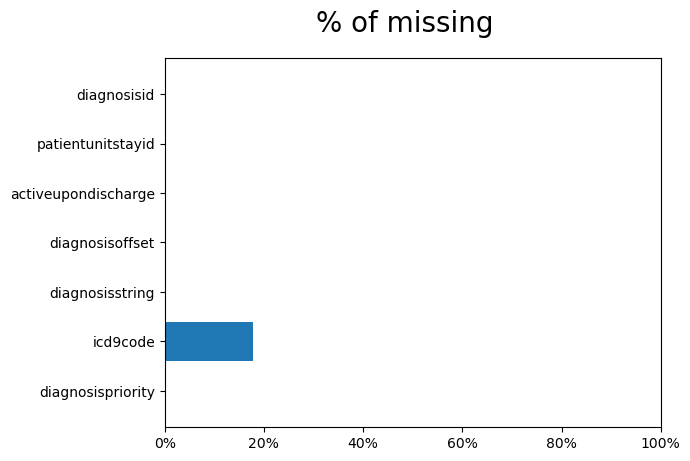

In [67]:
# added a plot for showing the percentage of trash
fig,ax = plt.subplots()
ax.barh(y,x,align ='center')
ax.invert_yaxis()
ax.set_xlim((0,100))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
fig.suptitle(r"% of missing",fontsize = 20)